In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, dbscan
from sklearn.preprocessing import StandardScaler

In [2]:
X, y_true = make_blobs(n_samples=500, cluster_std=0.60, centers=3,random_state=42)

In [3]:
X

array([[-6.1900632 , -7.30201545],
       [ 3.02174685,  1.94059276],
       [ 5.9537606 ,  1.48819071],
       [-2.74446251,  8.13617716],
       [ 5.36060719,  1.72832446],
       [ 5.13808033,  1.45951939],
       [-5.34357647, -6.93774553],
       [ 4.80215293,  1.94302682],
       [ 3.99930658,  1.88774199],
       [-7.25451834, -6.86445496],
       [ 4.25193511,  1.32424088],
       [-1.81404028,  8.52187674],
       [-1.2293776 ,  7.84303345],
       [-2.16666332,  9.69562551],
       [ 4.81374375,  3.21841016],
       [ 5.27493353,  0.91792599],
       [-2.5524037 ,  9.61640587],
       [-7.5532604 , -6.65066375],
       [-6.8302568 , -6.24082137],
       [-3.17299861,  8.29656215],
       [ 3.80073829,  2.31095123],
       [-2.38387947,  7.83848405],
       [ 4.98581301,  2.15991978],
       [-5.94031277, -6.91955975],
       [-7.14748736, -6.7636556 ],
       [ 4.87655012,  1.720579  ],
       [ 4.48689251,  2.87556548],
       [-6.4081471 , -6.62483506],
       [-6.71939703,

In [4]:
df = pd.DataFrame(X, columns=['Feature_1','Feature_2'])

In [5]:
df

,Feature_1,Feature_2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324
...,...,...
495,-6.040014,-6.325329
496,-2.555459,9.218977
497,4.438408,2.974583
498,-7.193261,-6.250704


In [6]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

In [7]:
inertia = []
K_range = range(1,11)

In [8]:
for k in K_range:
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(x_scaled)
    inertia.append(km.inertia_)

In [9]:
inertia

[1000.0000000000002,
 297.8954141051722,
 11.575484723104978,
 9.752067977356838,
 8.25717527244628,
 6.9175773204167985,
 6.334755391595288,
 5.70417717790143,
 5.0602341335320755,
 4.762361898130396]

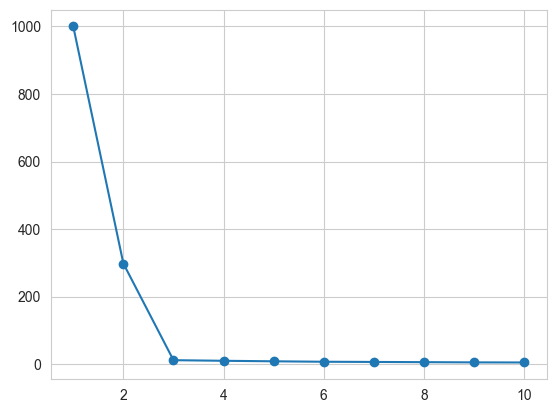

In [10]:
plt.plot(K_range, inertia, marker='o')

In [11]:
kmean_final = KMeans(n_clusters=2, random_state=42)

In [12]:
culuster_label = kmean_final.fit_predict(x_scaled)

In [13]:
culuster_label

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [14]:
df['culuster'] = culuster_label

<Axes: xlabel='Feature_1', ylabel='culuster'>

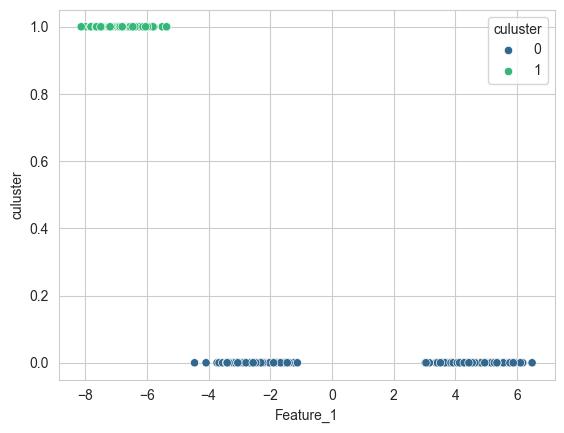

In [15]:
sns.scatterplot(x=df['Feature_1'], y=df['culuster'],hue=df['culuster'],palette='viridis')

In [16]:
from sklearn.datasets import make_moons

In [17]:
X, y_true = make_moons(n_samples=500, noise=0.05, random_state=42)

In [18]:
from sklearn.cluster import KMeans, DBSCAN

In [19]:
df = pd.DataFrame(X, columns=['Feature_1','Feature_2'])

In [20]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

In [21]:
kmean = KMeans(n_clusters=2, random_state=42)

In [22]:
kmeans_label = kmean.fit_predict(x_scaled)

In [23]:
df['kmeans_label'] = kmeans_label

In [25]:
df

,Feature_1,Feature_2,kmeans_label
0,0.830586,-0.447733,1
1,0.701678,0.816918,0
2,1.022080,-0.492571,1
3,-0.316765,0.953438,0
4,0.293226,1.057185,0
...,...,...,...
495,0.239754,0.985462,0
496,0.072145,0.184834,0
497,0.590273,-0.365577,1
498,1.619465,-0.283658,1


<Axes: xlabel='Feature_1', ylabel='Feature_2'>

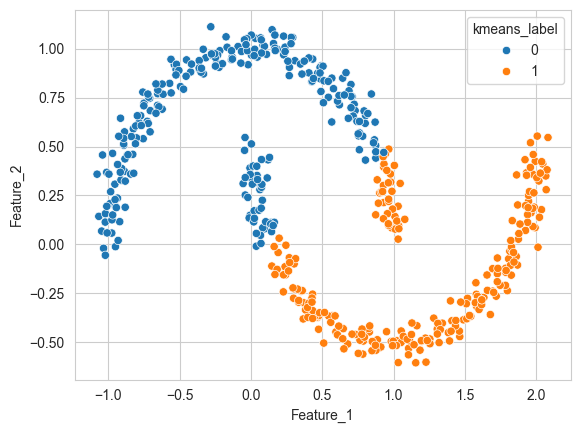

In [27]:
sns.scatterplot(x=df['Feature_1'],y=df['Feature_2'],hue=df['kmeans_label'],palette='tab10')

In [28]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_label = dbscan.fit_predict(x_scaled)